In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load all cleaned datasets
benin = pd.read_csv(r"C:\Users\pc\Week-solar\data\benin_clean.csv", parse_dates=["Timestamp"])
sierra = pd.read_csv(r"C:\Users\pc\Week-solar\data\sierra_leone.csv", parse_dates=["Timestamp"])
togo = pd.read_csv(r"C:\Users\pc\Week-solar\data\togo_clean.csv", parse_dates=["Timestamp"])

# Add country column
benin["Country"] = "Benin"
sierra["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine
df_all = pd.concat([benin, sierra, togo], ignore_index=True)


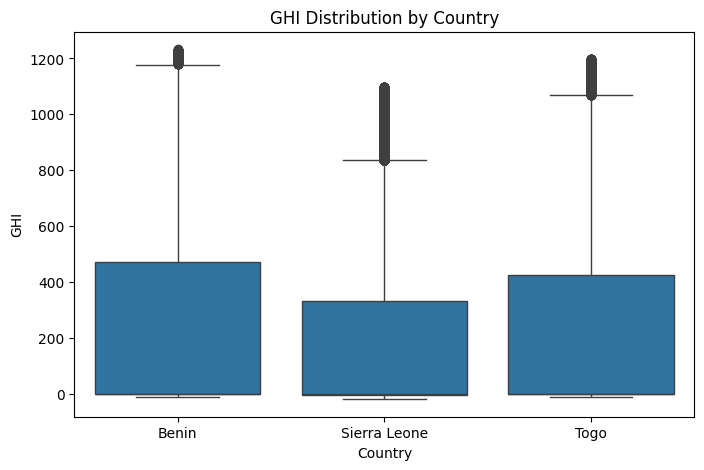

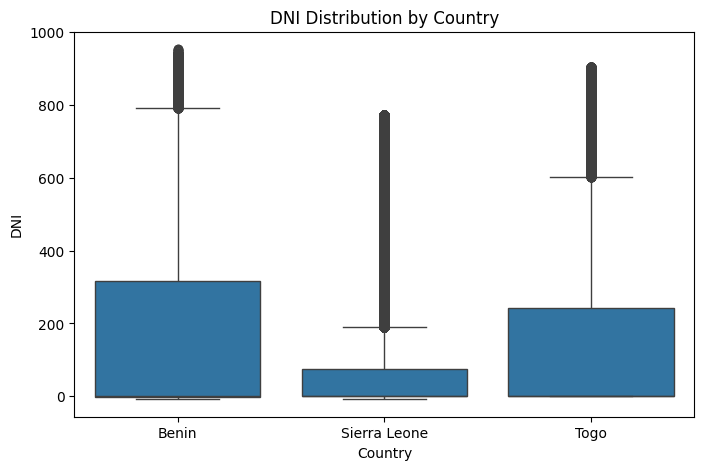

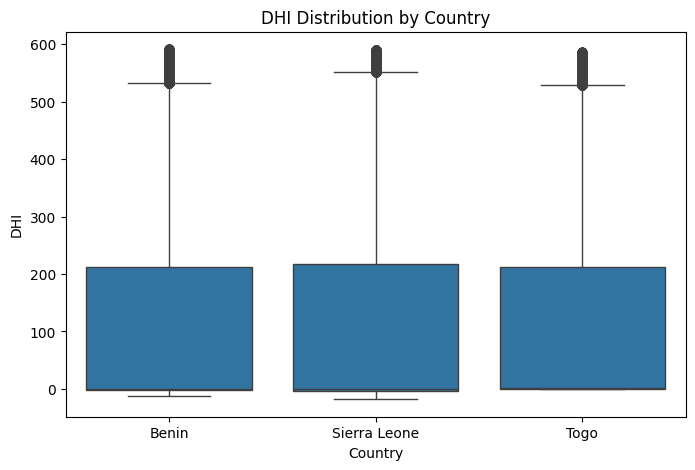

In [4]:
metrics = ["GHI", "DNI", "DHI"]

for m in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Country", y=m, data=df_all)
    plt.title(f"{m} Distribution by Country")
    plt.show()


In [5]:
summary = df_all.groupby("Country")[["GHI","DNI","DHI"]].agg(["mean","median","std"])
summary

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.378748    0.7  328.496230  167.055791   -0.1  262.371237   
Sierra Leone  185.641230   -0.4  279.853057  104.594293   -0.1  201.498738   
Togo          224.818416    0.8  317.964035  149.050148    0.0  248.963752   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.638180    0.5  153.128797  
Sierra Leone  108.275696   -0.6  153.780304  
Togo          112.915456    1.7  151.508062

In [6]:
from scipy.stats import f_oneway, kruskal

# Example for GHI
ghi_groups = [df_all[df_all["Country"]==c]["GHI"].dropna() for c in df_all["Country"].unique()]

anova_result = f_oneway(*ghi_groups)
print("ANOVA result for GHI:", anova_result)

kruskal_result = kruskal(*ghi_groups)
print("Kruskal-Wallis result for GHI:", kruskal_result)


ANOVA result for GHI: F_onewayResult(statistic=np.float64(3812.2728541531364), pvalue=np.float64(0.0))
Kruskal-Wallis result for GHI: KruskalResult(statistic=np.float64(6612.0717598326655), pvalue=np.float64(0.0))


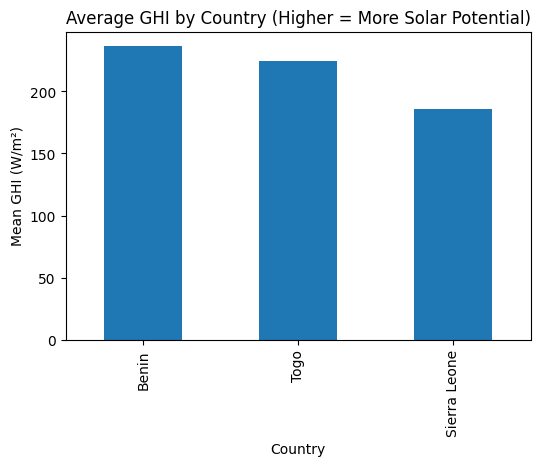

Country
Benin           236.378748
Togo            224.818416
Sierra Leone    185.641230
Name: GHI, dtype: float64

In [7]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

avg_ghi.plot(kind="bar", figsize=(6,4))
plt.title("Average GHI by Country (Higher = More Solar Potential)")
plt.ylabel("Mean GHI (W/m²)")
plt.show()

avg_ghi
